## Plotting time dependent data

x-axis labelling can be an issue when plotting date values using bar charts

In [1]:
import pandas as pd
import numpy as np

In [2]:
# generate some dummy data
rng = pd.date_range('2020-01-01', periods=1000, freq='H')
df = pd.DataFrame({ 'date': rng, 'val' : abs(np.random.randn(len(rng)))}) 
df.head(2)

,date,val
0,2020-01-01 00:00:00,0.425046
1,2020-01-01 01:00:00,1.835752


In [3]:
# group on weekly level
df.groupby(pd.Grouper(key='date',freq='w'))['val'].sum().head(2)

date
2020-01-05     98.002883
2020-01-12    121.874657
Freq: W-SUN, Name: val, dtype: float64

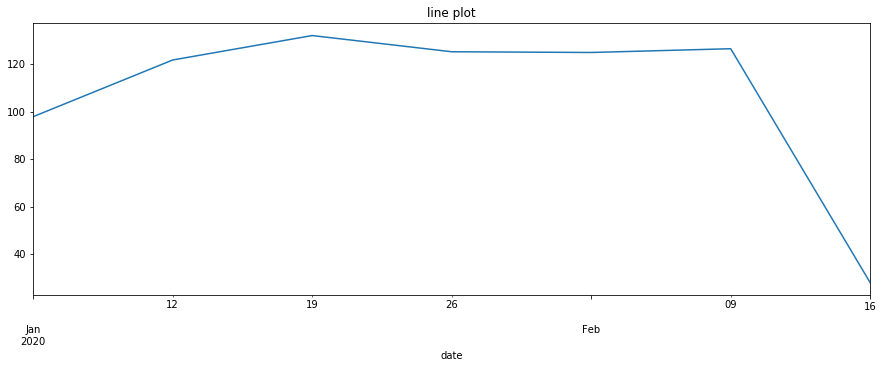

In [24]:
# make a line plot of the weekly summed values
df_plot=df.groupby(pd.Grouper(key='date',freq='w'))['val'].sum()
df_plot.plot(figsize=(15,5),title='line plot')

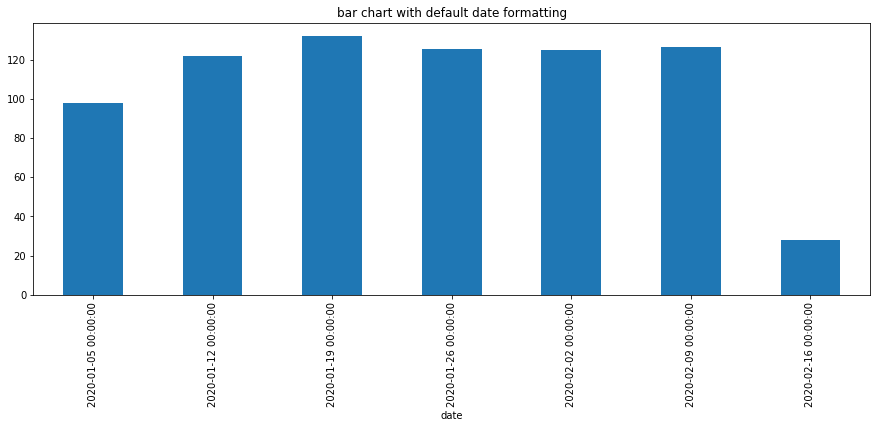

In [25]:
# make a bar plot of the weekly summed values
df_plot.plot(kind='bar',figsize=(15,5), title='bar chart with default date formatting')

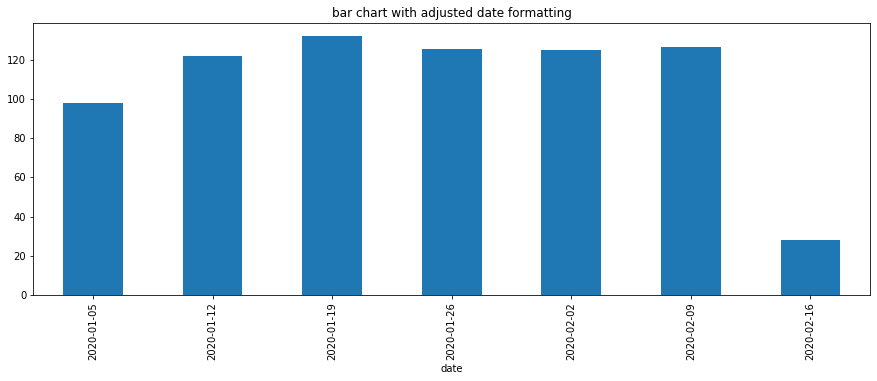

In [26]:
# make a line plot of the weekly summed values, now with fixed x-axis labelling
import matplotlib.pyplot as plt
df_plot.plot(kind='bar',figsize=(15,5), title='bar chart with adjusted date formatting')
plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df_plot.index.to_series().dt.strftime("%Y-%m-%d")))


In [28]:
import calendar
df_plot.index = df_plot.index.to_series().apply(lambda x:str(x.year)+'-'+calendar.month_abbr[x.month]+'-'+str(x.day))

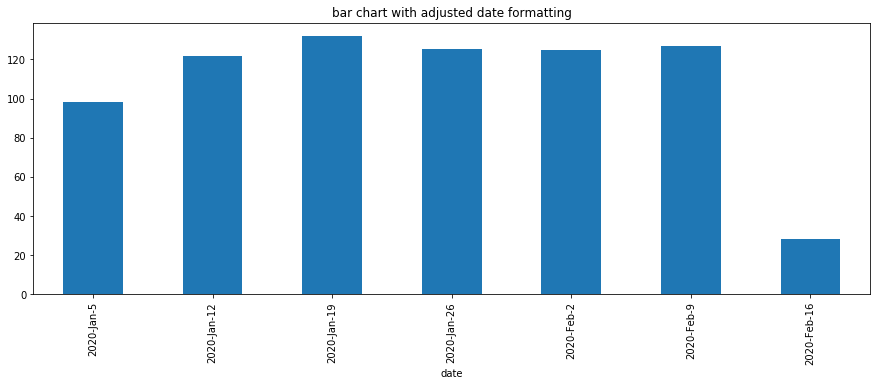

In [29]:
df_plot.plot(kind='bar',figsize=(15,5), title='bar chart with adjusted date formatting')
